# Burgers equation using FFT

See notes of Hannes Uecker, Example 3.6.

$$
u_t + f(u)_x = \nu u_{xx}, \qquad f(u) = \frac{1}{2} u^2
$$

with periodic boundaries and initial condition

$$
u(x,0) = 1/\cosh(4(x-\pi))
$$

Take Fourier transform

$$
\hat{u}_t + i k \hat{f} = -\mu k^2 \hat u, \qquad \hat{f} = \widehat{ \left(\frac{u^2}{2}\right) }
$$

Semi-implicit scheme

\begin{align}
\frac{\hat{u}^{n+1} - \hat{u}^n}{\Delta t} + i k \hat{f}^n &= - \nu k^2 \hat{u}^{n+1} \\
\hat{u}^{n+1} = \frac{\hat{u}^n - (i k \Delta t) \hat{f}^n}{1 + \nu k^2 \Delta t}
\end{align}

In [51]:
from pylab import *
from matplotlib.collections import PolyCollection

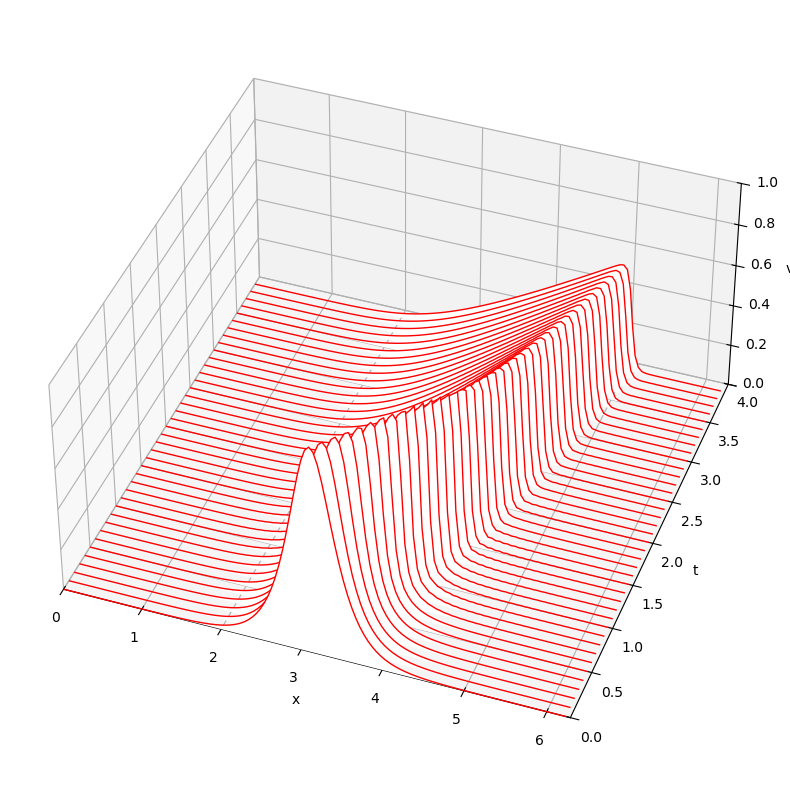

In [52]:
nu = 1.0e-2
N  = 128
h  = 2*pi/N
x  = h * arange(N)

t = 0.0; dt = h/5.0
tmax = 4.0; tplot = 0.1;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot))

k = 2*pi*fftfreq(N,h)
mu = 1.0/(1.0 + nu * dt * k**2)

# Initial condition
v = 1.0/cosh(4*(x-pi))

data = []; data.append(list(zip(x, v)))
tdata = []; tdata.append(0.0)

for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        vh = fft(v)
        fh = fft(0.5*v**2)
        vh = mu * (vh - dt * 1j * k * fh)
        v = real(ifft(vh))
    data.append(list(zip(x, v)))
    tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
poly = PolyCollection(data, closed=False, facecolors='white', edgecolors='red')
poly.set_alpha(1)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('x'); ax.set_ylabel('t'); ax.set_zlabel('v')
ax.set_xlim3d(0, 2*pi); ax.set_ylim3d(0, 4); ax.set_zlim3d(0, 1)
ax.view_init(40,-70)
ax.set_box_aspect(aspect=(1, 1, 0.5))

## Animation

In [53]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2*pi), ylim=(-0.1, 1.1))
line, = ax.plot([], [], 'r-', lw=2, label='u')
ax.set_xlabel('x'); ax.set_ylabel('u')
plt.close();

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x, v = zip(*data[i])
    line.set_data(x, v)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, repeat=False,
                               frames=len(data), interval=50, blit=True)

# Save to file
#try:
#    anim.save('p06.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
#except:
#    print("Cannot save mp4 file")

In [54]:
anim